In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


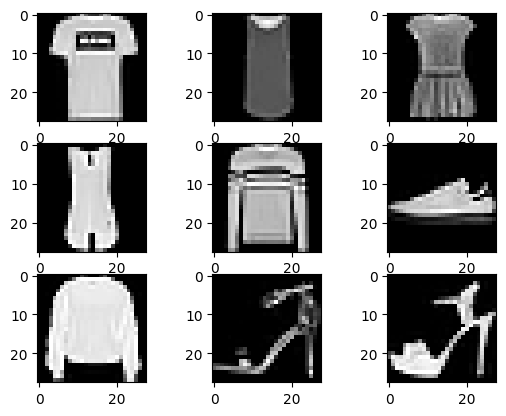

In [3]:
for i in range(1, 10):

    plt.subplot(3, 3, i)

    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
def model_arch():
	models = Sequential()

	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))

	models.add(Flatten())
	models.add(Dense(256, activation="relu"))
	models.add(Dense(10, activation="softmax"))

	return models

In [5]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

In [6]:

history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 17s 81ms/step - loss: 3.2903 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.4280 - val_sparse_categorical_accuracy: 0.8433
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.3665 - sparse_categorical_accuracy: 0.8661 - val_loss: 0.3415 - val_sparse_categorical_accuracy: 0.8732
Epoch 3/10
100/100 [==============================] - 5s 51ms/step - loss: 0.3064 - sparse_categorical_accuracy: 0.8871 - val_loss: 0.3085 - val_sparse_categorical_accuracy: 0.8857
Epoch 4/10
100/100 [==============================] - 5s 54ms/step - loss: 0.2659 - sparse_categorical_accuracy: 0.9028 - val_loss: 0.2954 - val_sparse_categorical_accuracy: 0.8908
Epoch 5/10
100/100 [==============================] - 5s 52ms/step - loss: 0.2331 - sparse_categorical_accuracy: 0.9137 - val_loss: 0.2898 - val_sparse_categorical_accuracy: 0.8962
Epoch 6/10
100/100 [==============================] - 5s 52ms/step - loss: 0.2156 - sparse_cat

10000
1/1 [==============================] - 0s 36ms/step
coat


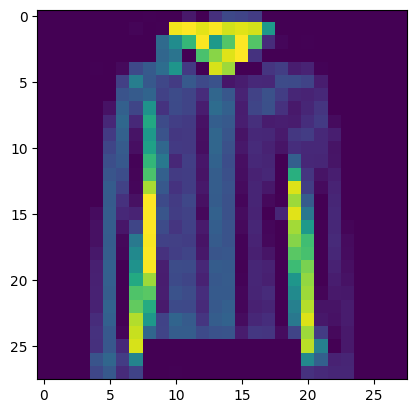

In [11]:

labels = ['t_shirt', 'trouser', 'pullover',
		'dress', 'coat', 'sandal', 'shirt',
		'sneaker', 'bag', 'ankle_boots']


print(len(testX))
predictions = model.predict(testX[6:7])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[6:7][0])
plt.show()
